**C**

In [ ]:
import torch

In [ ]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'googlenet', pretrained=True)
model.eval()

Downloading: "https://github.com/pytorch/vision/archive/v0.10.0.zip" to /root/.cache/torch/hub/v0.10.0.zip
Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth


  0%|          | 0.00/49.7M [00:00<?, ?B/s]

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [ ]:
import urllib
url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

In [ ]:
# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms
input_image = Image.open(filename)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)
# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
print(output[0])
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)
print(probabilities)

tensor([ 3.5607e-02, -2.2878e-01, -3.2326e-01,  5.5471e-02,  1.1363e-01,
        -2.8251e-01,  6.1544e-01,  6.0954e-02,  9.4566e-01, -1.4981e+00,
        -5.5102e-01, -3.6586e-02, -1.2635e+00, -3.1756e-02,  5.3338e-01,
         1.8750e-01,  4.9309e-01, -2.8286e-01, -2.7196e-01, -2.6181e-01,
        -3.3155e-01, -7.5719e-02,  6.7103e-02, -5.7090e-01, -5.3175e-01,
        -4.9965e-02,  7.2163e-01,  1.1626e+00,  5.1519e-01,  1.3022e+00,
         6.9073e-01,  5.5678e-01,  1.3274e-01, -7.1238e-01, -5.0567e-01,
        -2.4467e-01, -5.9905e-01,  1.9404e-01, -3.2087e-01,  6.1736e-01,
         2.9624e-01, -2.4294e-01,  1.8518e-01, -4.5889e-01,  1.5296e-01,
        -6.8361e-01,  9.9018e-01,  6.1654e-01, -1.2935e+00, -4.6649e-01,
        -7.1416e-02, -3.3998e-04,  3.7410e-01,  1.8117e-01,  8.5821e-01,
         1.0058e+00, -3.0185e-01,  1.9625e-02,  7.9075e-02,  8.1202e-01,
         7.7451e-01, -7.0558e-01, -2.2717e-01, -2.5872e-01,  1.5508e-01,
        -4.5723e-01,  7.8179e-01,  1.4157e-01,  1.0

In [ ]:
# Download ImageNet labels
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

# Read the categories
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]

--2022-04-24 12:59:35--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0s      

2022-04-24 12:59:35 (62.1 MB/s) - ‘imagenet_classes.txt’ saved [10472/10472]



In [ ]:
# display(input_image)
_, indices = torch.topk(probabilities, 3)
for index in indices:
    print('Object {} with probability {}'.format(categories[index], probabilities[index]))

Object Samoyed with probability 0.9378381967544556
Object Pomeranian with probability 0.00828344002366066
Object Great Pyrenees with probability 0.005603068508207798


**D**

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
import logging
from sklearn.metrics import classification_report, confusion_matrix
from time import time
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

tf.autograph.set_verbosity(0, False)

In [2]:
model = tf.keras.applications.inception_v3.InceptionV3(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax"
)

96124928/96112376 [==============================] - 1s 0us/step


In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)

170508288/170498071 [==============================] - 2s 0us/step
x_train: (50000, 32, 32, 3)
y_train: (50000, 1)


In [4]:
from tensorflow.keras.applications.inception_v3 import preprocess_input

def onehot(a):
    a = a.flatten()
    o = np.zeros((a.size, a.max() + 1))
    o[np.arange(a.size), a] = 1
    return o

def preprocess(x, y):
    y = onehot(y)  # onehot labels
    return x, y


In [5]:
class Trainer:
    def __init__(self, activation_function="relu", 
                 optimizer="adam", 
                 loss_function='categorical_crossentropy') -> None:
        self.optimizer = optimizer
        self.activation_function = activation_function
        self.loss_function = loss_function
        self.model = self.build_cnn_model()
        self.history = None
        self.training_time = None
        
    def build_cnn_model(self):
        model = tf.keras.applications.inception_v3.InceptionV3(
            include_top=False,
            weights="imagenet",
            input_tensor=tf.keras.layers.Resizing(256, 256)(tf.keras.Input(shape=(32, 32, 3)))
        )
        x = model.layers[-1].output
        x = tf.keras.layers.GlobalAveragePooling2D()(x)
        x = tf.keras.layers.Dense(10, activation='softmax')(x)
        model = tf.keras.Model(inputs=model.inputs, outputs=x)

        model.compile(
            optimizer=self.optimizer,
            loss=self.loss_function,
            metrics=['accuracy']
        )
        return model
    
    def train(self, x_train, y_train, batch_size=32, epochs=50):
        self.batch_size = batch_size
        assert y_train.shape[1:] == (10, )
        early_stopping = tf.keras.callbacks.EarlyStopping(
            monitor='val_loss', 
            verbose=1,
            patience=4,
            mode='min',
            restore_best_weights=True
        )
        start = time()
        self.history = self.model.fit(
            x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=1,
            validation_split=0.2,
            callbacks=[early_stopping],
        )
        self.training_time = time() - start
    
    def plot_history(self):
        fig = plt.figure(figsize=(12, 4))
        metrics = ['loss', 'accuracy']
        for n, metric in enumerate(metrics):
            plt.subplot(1, 2, n+1)
            plt.plot(self.history.epoch, self.history.history[metric], label='Train')
            plt.plot(self.history.epoch, self.history.history[f"val_{metric}"], linestyle="--", label='Validation')
            plt.xlabel('Epoch')
            plt.ylabel(metric)
            plt.title(metric)
        plt.legend()
        plt.show()
    
    def evaluate(self, x_test, y_test):
        assert y_test.shape[1:] == (10, )
        [test_loss,test_acc] = self.model.evaluate(x_test,y_test)
        print("Test Loss:", test_loss, "Test Accuracy:", test_acc)
        test_preds = np.argmax(self.model.predict(x_test), axis=-1)
        y_test = np.argmax(y_test, axis=-1)
        print(classification_report(y_test, test_preds))
      
          
    def print_summary(self):
        print(f"Training Time: {self.training_time:.2f}s")
        print("batch size:", self.batch_size)
        print("optimizer:", self.optimizer)
        print("activation_function:", self.activation_function)
        print("loss_function", self.loss_function)
        print(self.model.summary())


In [6]:
x_train_processed, y_train_processed = preprocess(x_train, y_train)
x_test_processed, y_test_processed = preprocess(x_test, y_test)

313/313 [==============================] - 428s 1s/step - loss: 0.3623 - accuracy: 0.8803 - val_loss: 0.4926 - val_accuracy: 0.8478
Training Time: 451.27s
batch size: 128
optimizer: <keras.optimizer_v2.adam.Adam object at 0x7fbb6c0ea850>
activation_function: relu
loss_function categorical_crossentropy
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 resizing (Resizing)            (None, 256, 256, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 127, 127, 32  864         ['resizing[0][0]']     

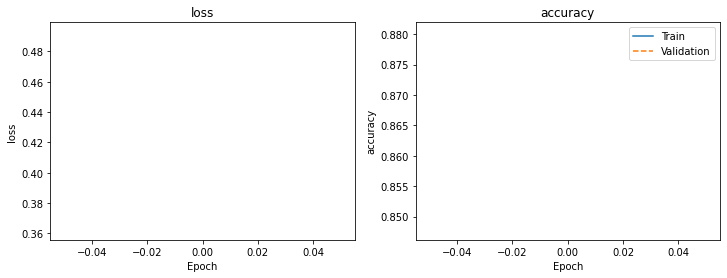

313/313 [==============================] - 32s 96ms/step - loss: 0.5031 - accuracy: 0.8403
Test Loss: 0.5030937790870667 Test Accuracy: 0.8403000235557556
              precision    recall  f1-score   support

           0       0.78      0.88      0.83      1000
           1       0.99      0.85      0.91      1000
           2       0.76      0.90      0.83      1000
           3       0.75      0.73      0.74      1000
           4       0.95      0.74      0.83      1000
           5       0.81      0.83      0.82      1000
           6       0.98      0.83      0.89      1000
           7       0.71      0.95      0.82      1000
           8       0.97      0.76      0.85      1000
           9       0.86      0.95      0.90      1000

    accuracy                           0.84     10000
   macro avg       0.86      0.84      0.84     10000
weighted avg       0.86      0.84      0.84     10000



In [7]:
trainer = Trainer(
    activation_function="relu", 
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-4), 
)
trainer.train(x_train_processed, y_train_processed, 
              batch_size=128, 
              epochs=1)
trainer.print_summary()
trainer.plot_history()
trainer.evaluate(x_test_processed, y_test_processed)